Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression. The cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients. When the penalty is set to zero, we are back to the linear regression case.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing


In [2]:
kc_data = pd.read_csv("kc_house_data.csv")

In [3]:
kc_data.shape

(21613, 21)

In [4]:
kc_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
#kc_data['price'] = kc_data['price']/1000

<AxesSubplot:>

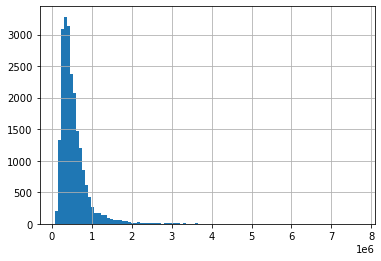

In [8]:
kc_data.price.hist(bins=100)

In [9]:
kc_data['price_log'] = np.log(kc_data['price']) 

<AxesSubplot:>

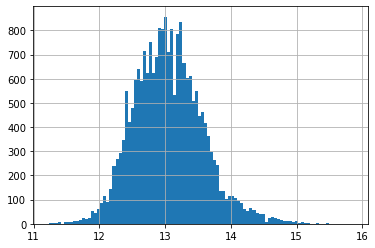

In [10]:
kc_data.price_log.hist(bins=100)

<AxesSubplot:xlabel='floors', ylabel='count'>

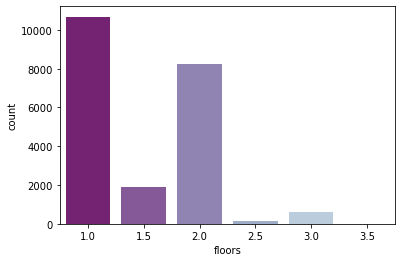

In [11]:
sns.countplot(x='floors', data=kc_data, palette='BuPu_r')

In [12]:
#sns.pairplot(kc_data[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']])

<AxesSubplot:>

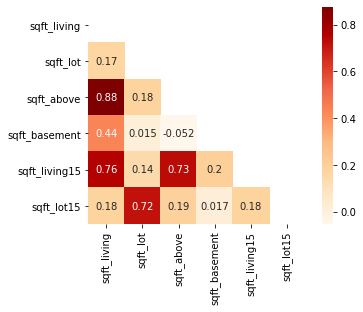

In [13]:
df_corr=kc_data[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']].corr()
sns.heatmap(df_corr,  cmap="OrRd", square=True, annot=True, mask = np.triu(df_corr.corr()))

### Engeneering more features. 

In [14]:
kc_data['years_old']=2015-kc_data['yr_built'] # why 2015?

### Challenge: How would you deal with the variable  `yr_renovated`?

In [15]:
kc_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_log', 'years_old'],
      dtype='object')

In [17]:
X_indicators = pd.get_dummies(kc_data[['condition']], columns = ['condition'] ,drop_first=True)

In [18]:
X_zip = pd.get_dummies(kc_data[['zipcode']], columns = ['zipcode'], drop_first=True)

In [19]:
X = kc_data[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_basement',  'years_old']]

<AxesSubplot:>

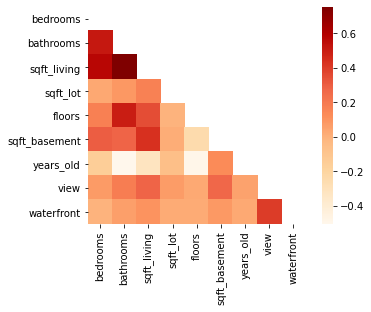

In [20]:

sns.heatmap(X.corr(),  cmap="OrRd", square=True, annot=False, mask = np.triu(X.corr()))

In [21]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_basement', 'years_old', 'view', 'waterfront'],
      dtype='object')

In [22]:
X = pd.concat([X, X_indicators, X_zip], axis=1)

In [23]:
X.shape

(21613, 82)

In [24]:
y = kc_data[['price_log']]

In [25]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_basement', 'years_old', 'view', 'waterfront', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.35, random_state=3123)
#from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print ("Training set score: {:.2f}".format(lr.score ( X_train , y_train )))
print ("Test set score: {:.2f}".format (lr.score(X_test , y_test ))) 

Training set score: 0.86
Test set score: 0.85


In [28]:
#lr.coef_

### Challenge: Does the linear regression do an equally good job if the price variable is in it's raw form?

### Ridge Regression


In [29]:
ridge = Ridge() 
ridge.fit(X_train, y_train)
print ("Training set score: {:.2f}".format(ridge.score (X_train , y_train )))
print ("Test set score: {:.2f}".format (ridge.score(X_test , y_test ))) 

Training set score: 0.86
Test set score: 0.85


In [30]:
ridge.coef_

array([[-0.00931586,  0.03858818,  0.2987785 ,  0.02628239, -0.01886191,
        -0.05804822, -0.00811691,  0.06299664,  0.0378657 ,  0.01997233,
         0.18447735,  0.18671475,  0.1309761 , -0.00782334,  0.00541131,
         0.13883597,  0.07213388,  0.10720347,  0.0606064 ,  0.07799021,
         0.01532009,  0.04543842,  0.02000717,  0.03166592,  0.00108511,
        -0.0019126 ,  0.02565653,  0.07591354,  0.05178771,  0.07927351,
         0.00516053,  0.0080559 , -0.00094056,  0.1148942 ,  0.08726078,
         0.02699165,  0.06311141,  0.10626398,  0.01018279,  0.03273193,
         0.10782073,  0.07809837,  0.01346029,  0.04056621,  0.02589749,
         0.05143348,  0.04611287,  0.02021261,  0.0612812 ,  0.08979342,
         0.07765804,  0.04902395,  0.00494131,  0.07258752,  0.14095117,
         0.09753768,  0.03504499,  0.09217831,  0.0329896 ,  0.07472726,
         0.12511001,  0.13694882,  0.09762368,  0.13025087,  0.0655782 ,
         0.09841701,  0.09698169,  0.07926933,  0.0

### Lasso regression

In [31]:
lasso = Lasso()
lasso.fit(X_train, y_train) 

Lasso()

In [32]:
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train))) 
print("Test set score: {:.2f}".format (lasso.score(X_test, y_test)))

Training set score: 0.00
Test set score: -0.00


In [33]:
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0 ))) 

Number of features used: 0


In [34]:
lasso001 = Lasso(alpha=0.01)
lasso001.fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format (lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0 )))

Training set score: 0.82
Test set score: 0.81
Number of features used: 71


### Challenge: Check which coefficients are set to zero by default.

In [35]:
lasso10 = Lasso(alpha=10)
lasso10.fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso10.score(X_train, y_train))) 
print("Test set score: {:.2f}".format (lasso10.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso10.coef_ != 0 )))

Training set score: 0.00
Test set score: -0.00
Number of features used: 0


Text(0, 0.5, 'Coefficient magnitude')

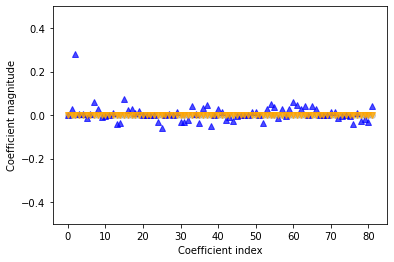

In [36]:
plt.plot(lasso.coef_ , 'o', color="gray", alpha=0.3, label = "Lasso alpha=1" ) 
plt.plot(lasso001.coef_ , '^', color="blue" , alpha=0.7, label = "Lasso alpha=0.01" ) 
plt.plot(lasso10.coef_ , 'v', color="orange", alpha=0.8 , label = "Lasso alpha=0.001" )
plt.ylim (-0.5 , 0.5 ) 
plt.xlabel("Coefficient index" ) 
plt.ylabel ("Coefficient magnitude" ) 


In [37]:
alpha=[0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 100, 1000]
score=[]
for i in alpha:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train, y_train) 
    score.append(lasso.score(X_test, y_test))

/Users/ariedamuco/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6483460884019223, tolerance: 0.38822957354808557
  model = cd_fast.enet_coordinate_descent(


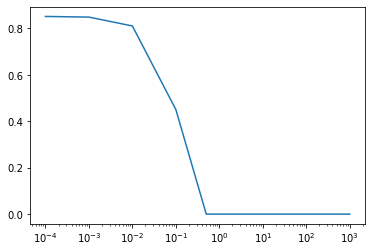

In [38]:
plt.plot(alpha, score)
plt.xscale("log")

### Challenge: Use as the raw price variable as outcome/target and repeat the exercise. Check the number of coefficients that shrink in each iteration. Interpret the results.

### Challenge: Try to improve the fit doing some pre-processing and scaling the data

- Check [Scalers from Scikit-Learn](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

https://www.kaggle.com/ivanzhouyue/lasso-ridge-regression-beginners

https://www.kaggle.com/learn-forum/152407

https://www.kaggle.com/jmataya/regularization-with-lasso-and-ridge/data

https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b